# Проект: Анализ бизнес-показателей

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

pd.options.display.float_format ='{:,.3f}'.format

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Загрузим датасеты
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv'),
        )
except:
    visits, orders, costs = (
        pd.read_csv(r"C:\Users\User\OneDrive\Education\1_Ya_DA\11_analysis_of_business_indicators\project_7\visits_info_short.csv"),
        pd.read_csv(r"C:\Users\User\OneDrive\Education\1_Ya_DA\11_analysis_of_business_indicators\project_7\orders_info_short.csv"),
        pd.read_csv(r"C:\Users\User\OneDrive\Education\1_Ya_DA\11_analysis_of_business_indicators\project_7\costs_info_short.csv"),
        )

Посмотрим на сводную информацию по каждому датасету.

In [3]:
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Вывод

- В столбцах с датой тип данных object, для дальнейшей работы с датой переведём эти значения в тип datetime. Во всех столбцах одинаковое количество значений - значит пропусков нет. Названия столбцов начинаются с заглавной буквы и в названии столбцов есть пробел - исправим это.

In [5]:
# Заменим пробелы на нижние подчёркивания
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [6]:
# Заменим заглавные буквы на прописные
for column in ['region', 'device', 'channel']:
    visits[column] = visits[column].str.lower()

In [7]:
# Изменим тип object на datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [8]:
# Проверим изменения
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [9]:
# Проверим наличие дубликатов
visits.duplicated().sum()

0

Посмотрим данные таблицы <strong>orders</strong>

In [10]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52    4.990
1  174361394180  2019-05-01 12:24:04    4.990
2  529610067795  2019-05-01 11:34:04    4.990
3  319939546352  2019-05-01 15:34:40    4.990
4  366000285810  2019-05-01 13:59:51    4.990

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [12]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [15]:
orders.duplicated().sum()

0

Посмотрим данные таблицы <strong>costs

In [16]:
costs.head()

dt   Channel   costs
0  2019-05-01  FaceBoom 113.300
1  2019-05-02  FaceBoom  78.100
2  2019-05-03  FaceBoom  85.800
3  2019-05-04  FaceBoom 136.400
4  2019-05-05  FaceBoom 122.100

In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [18]:
costs.columns = costs.columns.str.lower()
costs['channel'] = costs['channel'].str.lower()

In [19]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [20]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Вывод

- На этапе предобработки были получены данные для анализа, которые приведены в соответствующие типы. 
- Пропусков и дубликатов не обнаружено. 
- Данные готовы для дальнейшего исследовательского анализа на выявление закономерностей и аномалий.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [21]:
# Создадим переменную profiles и запишем в неё данные о первых посещениях и других 
# признаках пользователей, которые понадобятся нам в дальнейшем для анализа.

profiles = (
    visits
        .sort_values(['user_id', 'session_start'])
        .groupby('user_id')
        .agg({
            'session_start': 'first', 
            'channel': 'first', 
            'region': 'first', 
            'device': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
)

# Определим дату первого посещения
profiles['dt'] = pd.to_datetime(profiles['first_ts'].dt.date)
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

# Проверим наличие id пользователя в таблице с заказами
profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

In [22]:
profiles.head()

user_id            first_ts     channel         region  device         dt  \
0    599326 2019-05-07 20:58:57    faceboom  united states     mac 2019-05-07   
1   4919697 2019-07-09 12:46:07    faceboom  united states  iphone 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic         france  iphone 2019-10-01   
3  22593348 2019-08-22 21:35:48  adnonsense        germany      pc 2019-08-22   
4  31989216 2019-10-02 00:07:44     yrabbit  united states  iphone 2019-10-02   

       month  payer  
0 2019-05-01   True  
1 2019-07-01  False  
2 2019-10-01  False  
3 2019-08-01  False  
4 2019-10-01  False

In [23]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150008 entries, 0 to 150007
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   150008 non-null  int64         
 1   first_ts  150008 non-null  datetime64[ns]
 2   channel   150008 non-null  object        
 3   region    150008 non-null  object        
 4   device    150008 non-null  object        
 5   dt        150008 non-null  datetime64[ns]
 6   month     150008 non-null  datetime64[ns]
 7   payer     150008 non-null  bool          
dtypes: bool(1), datetime64[ns](3), int64(1), object(3)
memory usage: 8.2+ MB


Проанализируем какие признаки характерны для первых посещений пользователей. Посмотрим из каких стран приходят больше всего посетителей и какая страна больше всех дает платящих пользователей.

In [24]:
# Определим минимальную  и максимальную дату привлечения пользователей
print('Минимальная дата привлечения: ', profiles['first_ts'].min())
print('Максимальная дата привлечения: ', profiles['first_ts'].max())

Минимальная дата привлечения:  2019-05-01 00:00:41
Максимальная дата привлечения:  2019-10-27 23:59:04


In [25]:
def prof_plot(column):
    """Функция принимает название столбца из датасета profiles и строит график относительно 
    выбранного признака пользователей, которые сконвертировлись в оплату.
    """

    (
        profiles
            .groupby(column)
            .agg({'user_id': 'count'})
            .sort_values('user_id', ascending=False)
            .plot(kind='bar', ax=plt.subplot(1, 2, 1), figsize=(12, 5), grid=True)
    )

    plt.title('Количество новых пользователей по ' + column)

    (
        profiles
            .query('payer == True')
            .groupby(column)
            .agg({'user_id': 'count'})
            .sort_values('user_id', ascending=False)
            .plot(kind='bar', ax=plt.subplot(1, 2, 2), figsize=(12, 5), grid=True)
    )
    
    plt.title('Количество новых платящих пользователей по ' + column)
    plt.show()
    
    print()
    print('Доля платящих по признаку ' + column)
    print()
    print(
        profiles
            .groupby(column)
            .agg({'user_id': 'count', 'payer': 'mean'})
            .rename(columns={'user_id': 'total_amount_user', 'payer': 'share_payer'})
            .sort_values('share_payer', ascending=False)
    )

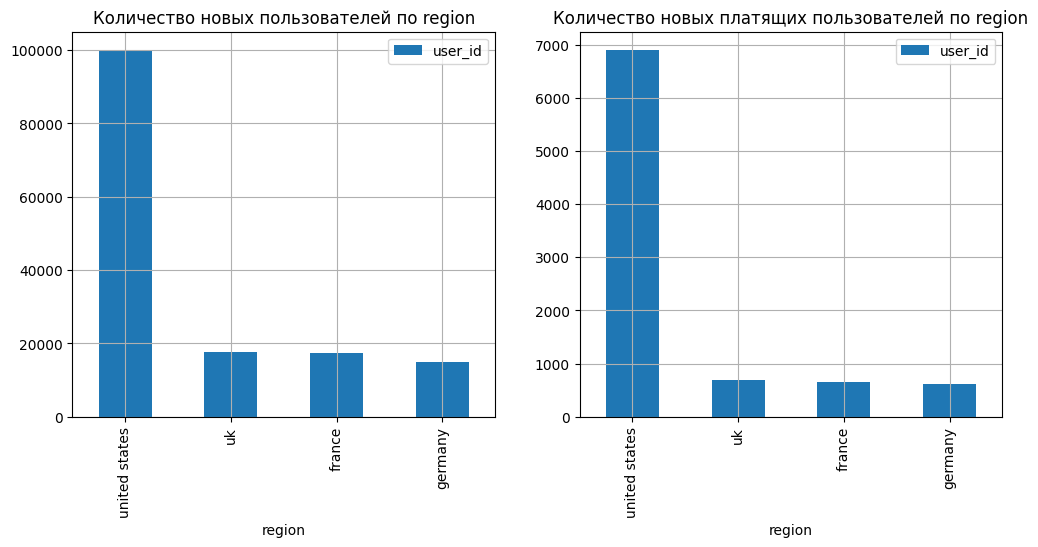


Доля платящих по признаку region

               total_amount_user  share_payer
region                                       
united states             100002        0.069
germany                    14981        0.041
uk                         17575        0.040
france                     17450        0.038


In [26]:
# Посмотрим на распределение новых и платящих пользователей по регионам
prof_plot('region')

Соединенные штаты лидируют по количеству привлеченных пользователей и доле платящих пользователей.

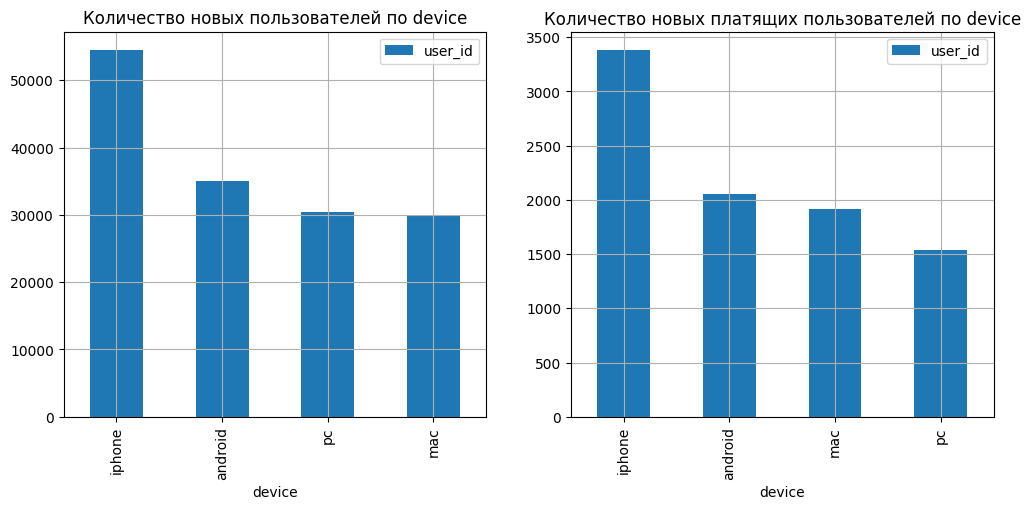


Доля платящих по признаку device

         total_amount_user  share_payer
device                                 
mac                  30042        0.064
iphone               54479        0.062
android              35032        0.059
pc                   30455        0.050


In [27]:
# Посмотрим, каким гаджетом пользуются пользователи и какой из них 
# характерен для платящих пользователей
prof_plot('device')

Пользователей с айфоном больше всех и они лучше конвертируются в покупку.

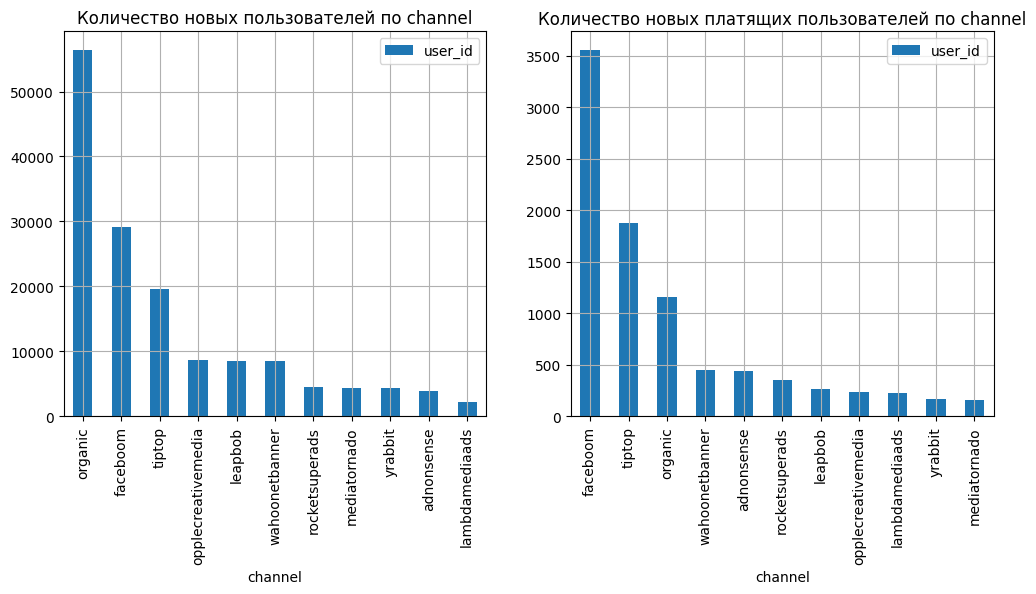


Доля платящих по признаку channel

                    total_amount_user  share_payer
channel                                           
faceboom                        29144        0.122
adnonsense                       3880        0.113
lambdamediaads                   2149        0.105
tiptop                          19561        0.096
rocketsuperads                   4448        0.079
wahoonetbanner                   8553        0.053
yrabbit                          4312        0.038
mediatornado                     4364        0.036
leapbob                          8553        0.031
opplecreativemedia               8605        0.027
organic                         56439        0.021


In [28]:
# Посмотрим на распределение пользователей по каналам привлечения
prof_plot('channel')

Один из самых важных признаков при оценке эффективности привлечения - откуда приходят новые пользовтели и какой канал лучше всех конвертирует в платящего. Из графиков видно, что канал faceboom, является наиболее успешным для привлечения платящих пользователей. На канал faceboom тратили больше всего денег.

Вывод

- США дает значительное количество пользователей и лидирует по доле платящих.
- iphone лидирует по количеству пользователей с устройствами этого производителя.
- faceboom привлекает самое большое количество платящих пользователей.

### Маркетинг:

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [29]:
# Посчитаем общую сумму расходов на маркетинг
costs['costs'].sum()

105497.30000000002

In [30]:
# Добавим в датасет необходимые для визуализации динамики столбцы
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

In [31]:
# Проверим наличие изменений 
costs.head()

dt   channel   costs  week  month
0 2019-05-01  faceboom 113.300    18      5
1 2019-05-02  faceboom  78.100    18      5
2 2019-05-03  faceboom  85.800    18      5
3 2019-05-04  faceboom 136.400    18      5
4 2019-05-05  faceboom 122.100    18      5

In [32]:
# Переменная, показывающая на какие каналы потратили больше всего денег 
# c переименованием столбца
costs_channel = (
    costs
        .groupby('channel')
        .agg({'costs': 'sum'})
        .rename(columns={'costs': 'total_costs'})
)

# Переменная по каналу с количеством пользователей, средней 
# по платящим пользователям с переименованием столбцов и сортировкой
profiles_of_channel = (
    profiles
        .groupby('channel')
        .agg({'user_id': 'count', 'payer': 'mean'})
        .rename(columns={'user_id': 'total_amount_user', 'payer': 'share_payer'})
        .sort_values('share_payer', ascending=False)
)
 
# Переменная по стоимости привлечения клиента с объединением двух таблиц
# по таблице profiles_of_channel с сортировкой по total_costs
cac_channel = (
    profiles_of_channel
        .join(costs_channel)
        .sort_values('total_costs', ascending=False)
)

cac_channel

total_amount_user  share_payer  total_costs
channel                                                        
tiptop                          19561        0.096   54,751.300
faceboom                        29144        0.122   32,445.600
wahoonetbanner                   8553        0.053    5,151.000
adnonsense                       3880        0.113    3,911.250
opplecreativemedia               8605        0.027    2,151.250
rocketsuperads                   4448        0.079    1,833.000
leapbob                          8553        0.031    1,797.600
lambdamediaads                   2149        0.105    1,557.600
mediatornado                     4364        0.036      954.480
yrabbit                          4312        0.038      944.220
organic                         56439        0.021          NaN

Вывод

Таблица показывает затраты на канал и сколько клиентов пришло из этого канала. Не самое лучшее распределение рекламного бюджета. Канал tiptop на вложенные 54.751 пришло 19.561 клиент, так себе результат в сравнении с каналом faceboom и adnonsense.

In [33]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
 3   week     1800 non-null   UInt32        
 4   month    1800 non-null   int64         
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 65.2+ KB


In [34]:
# Выясним, как траты распределены по каналам
channel_costs_total_amount = pd.DataFrame()
channel_costs_total_amount['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs_total_amount['cost_to_channel'] = ((channel_costs_total_amount['costs'] / 
                                                  costs['costs'].sum()) * 100)

(
    channel_costs_total_amount
        .sort_values(by='cost_to_channel', ascending=False)
        .style
        .format({'cost_to_channel': '{:.2f}%', 'costs': '{:.0f}'})
)

Вывод

 - Больше всего трат приходитя на источник tiptop. Следом идет источник faceboom. Далее идут низкозатратные источники wahoonetbanner, adnonsense, opplecreativemedia. На оставшиеся источники приходится 1-2% трат.

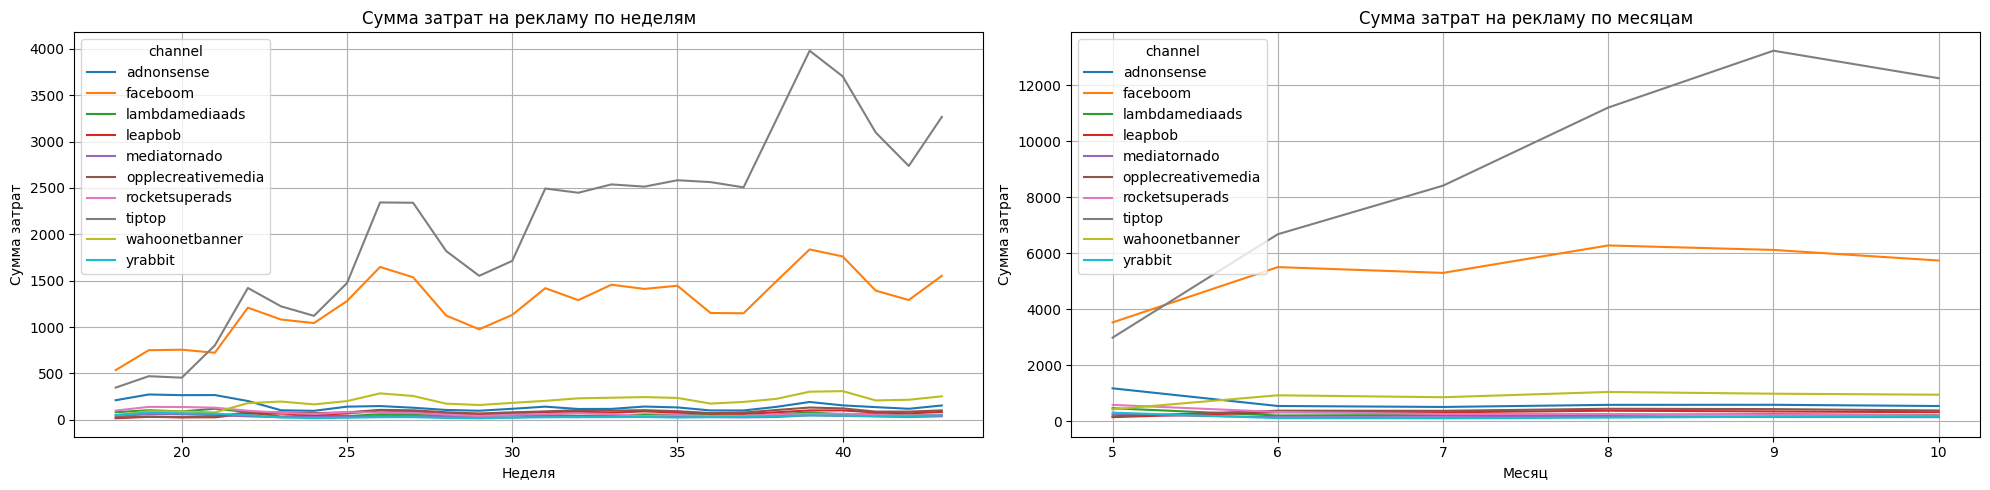

In [35]:
# Построим графики динамики затрат по неделям, месяцам на рекламу
# Подготовим сводные таблицы: названия строк - недели, месяцы;
# названия столбцов - канал; значение ячеек - суммарные затраты
# Выведем данные на одной подложке

(
    costs
        .pivot_table(
            index='week', 
            columns='channel', 
            values='costs', 
            aggfunc='sum')
        .plot(
            grid=True, 
            figsize=(20,5), 
            ax=plt.subplot(1,2,1))
)

plt.title('Сумма затрат на рекламу по неделям')
plt.xlabel('Неделя')
plt.ylabel('Сумма затрат')

(
    costs
        .pivot_table(
            index='month', 
            columns='channel', 
            values='costs', 
            aggfunc='sum')
        .plot(
            grid=True, 
            figsize=(20,5), 
            ax=plt.subplot(1,2,2))
)

plt.title('Сумма затрат на рекламу по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма затрат')
plt.tight_layout()

Вывод

Затраты на канал tiptop растут вплоть до сентября, в то время как на другие канали расходы примерно постоянны. 

Сколько в среднем стоило привлечение одного пользователя(САС) из каждого источника?

Ранее мы составили таблицу cac_channel в которой объединили данные о том сколько пользователей пришло из разных каналов с рекламными затратами на привлечение в соответствующем канале. Теперь посчитаем сколько стоит привлечение 1-го пользователя в каждом канале. 

In [36]:
# Уберем из таблицы канал organic, так как на этот канал не тратили рекламный бюджет
cac_channel = cac_channel.drop('organic')
# Отношение, всего затрат по каналу на общее количество пользователей
cac_channel['cac'] = cac_channel['total_costs'] / cac_channel['total_amount_user']
cac_channel

total_amount_user  share_payer  total_costs   cac
channel                                                              
tiptop                          19561        0.096   54,751.300 2.799
faceboom                        29144        0.122   32,445.600 1.113
wahoonetbanner                   8553        0.053    5,151.000 0.602
adnonsense                       3880        0.113    3,911.250 1.008
opplecreativemedia               8605        0.027    2,151.250 0.250
rocketsuperads                   4448        0.079    1,833.000 0.412
leapbob                          8553        0.031    1,797.600 0.210
lambdamediaads                   2149        0.105    1,557.600 0.725
mediatornado                     4364        0.036      954.480 0.219
yrabbit                          4312        0.038      944.220 0.219

In [37]:
print('Стоимость привлечения пользователя по всем каналам привлечения:')
# Отношение, показывающее стоимость привлечения одного пользователя
cac_channel['total_costs'].sum() / cac_channel['total_amount_user'].sum()

Стоимость привлечения пользователя по всем каналам привлечения:


1.1274813239427588

Вывод

- Стоимость привлечения в канале tiptop составляет 2.80, что более чем в 2 раза превышает стоимость привлечения в канал faceboom
- Общая стоимость привлечения пользователя составила - 1.13

Промежуточный вывод

- Всего на маркетинг потрачено 105497.3

- Больше всего трат приходитя на источник tiptop. Следом идет источник faceboom. Далее идут низкозатратные источники wahoonetbanner, adnonsense, opplecreativemedia. На оставшиеся источники приходится 1-2% трат.

- Визуализировано изменение метрик во времени. Заметны два "активных игрока" - это tiptop и faceboom. Больше всего трафика закупали у tiptop.

- Среди рекламных источников помимо tiptop и faceboom с мая начали расти траты на wahoonetbanner (к октябрю их число было в районе 53). Затраты на adnonsense, наоборот, стали снижаться с мая 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20.

- Стоимость привлечения пользователя по всем каналам привлечения - 1.13

- Самый дорогой трафик - tiptop (средняя стоимость - 2.80 за пользователя), далее идет faceboom и adnonsense примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта Retention Rate,
- get_conversion() — для подсчёта конверсии,
- get_ltv() — для подсчёта LTV.

А также функции для построения графиков:
- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.


In [38]:
# Функция для создания профилей пользователей

def get_profiles(profiles, orders, ad_costs):
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения

    new_users = (
        profiles
        .groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [39]:
# Получим пользовательские профили применив функцию get_profiles
profiles = get_profiles(profiles, orders, costs)

In [40]:
profiles.head()

user_id            first_ts     channel         region  device         dt  \
0    599326 2019-05-07 20:58:57    faceboom  united states     mac 2019-05-07   
1   4919697 2019-07-09 12:46:07    faceboom  united states  iphone 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic         france  iphone 2019-10-01   
3  22593348 2019-08-22 21:35:48  adnonsense        germany      pc 2019-08-22   
4  31989216 2019-10-02 00:07:44     yrabbit  united states  iphone 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True             1.088  
1 2019-07-01  False             1.107  
2 2019-10-01  False             0.000  
3 2019-08-01  False             0.988  
4 2019-10-01  False             0.231

In [41]:
# Функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )

    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], 
        on='user_id', 
        how='left'
    )

    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, 
            columns='lifetime', 
            values='user_id', 
            aggfunc='nunique'
        )

        cohort_sizes = (
            df
                .groupby(dims)
                .agg({'user_id': 'nunique'})
                .rename(columns={'user_id': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [42]:
# Функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases
            .sort_values(by=['user_id', 'event_dt'])
            .groupby('user_id')
            .agg({'event_dt': 'first'})
            .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, 
            columns='lifetime', 
            values='user_id', 
            aggfunc='nunique'
        )

        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df
                .groupby(dims)
                .agg({'user_id': 'nunique'})
                .rename(columns={'user_id': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [43]:
# Функция для подсчёта LTV

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )

    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )

        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # вычисляем размеры когорт
        cohort_sizes = (
            df
                .groupby(dims)
                .agg({'user_id': 'nunique'})
                .rename(columns={'user_id': 'cohort_size'})
        )

        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac
                .groupby(dims)
                .agg({'acquisition_cost': 'mean'})
                .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<strong> Функции для построения графиков </strong>

In [44]:
# Функция для сглаживания кривых

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [45]:
# Функция для построения графиков удержания пользователей

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)

    (
        retention
            .query('payer == True')
            .droplevel('payer')
            .T
            .plot(grid=True, ax=ax1)
    )

    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)

    (
        retention
            .query('payer == False')
            .droplevel('payer')
            .T
            .plot(grid=True, ax=ax2)
    )

    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)

    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [46]:
# Функция для построения графиков конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [47]:
# Функция для визуализации LTV и ROI

def plot_ltv_roi(
    ltv, 
    ltv_history, 
    roi, 
    roi_history, 
    horizon, 
    window=7
):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])

    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])

    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)

    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
  - Окупается ли реклама, направленная на привлечение пользователей в целом?
  - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
  - Чем могут быть вызваны проблемы окупаемости?
Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [48]:
# Зададим момент и горизонт анализа
observation_date = datetime(2019, 10, 27).date()
horizon_days = 14

In [49]:
# Исключим из анализа органических пользователей
profiles_without_organic = profiles.query('channel != "organic"')

In [50]:
# Проанализируем общую окупаемость рекламы
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=[]
)

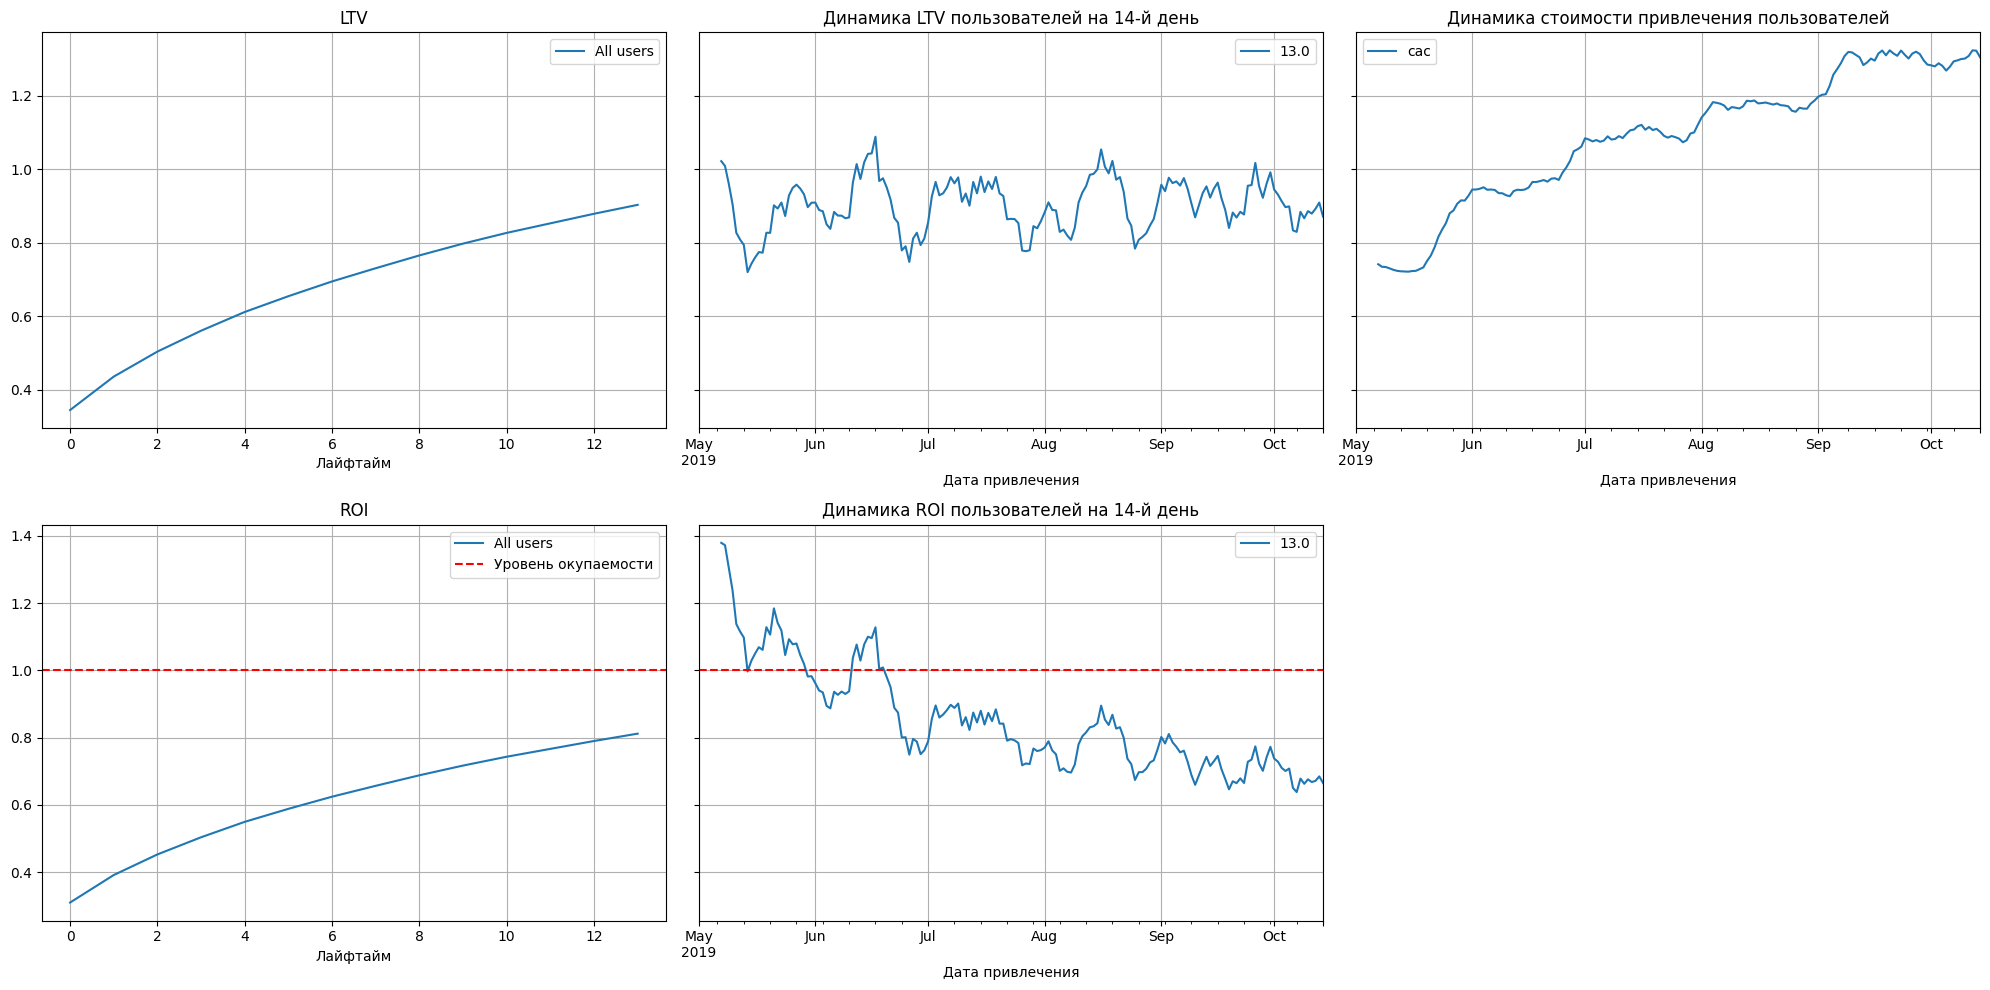

In [51]:
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Выводы

- Реклама не окупается с конца июля, сохраняется тренд на снижение ROI и увеличения стоимости привлечения клинета.
- Стоимость привлечения клиента CAC растет, что говорит о увеличении рекламного бюджета со временем и выбором, скорее всего наиболее дорогих каналов привлечения.
- LTV имеет небольшой скачок прироста с июня по июль, далее этот показатель достаточно стабилен и колеблется от 0,6 до 0,8. Значит привлекаемые пользователи в целом попадают в целевую аудиторию.
- ROI падает, до июля показатель был выше уровня окупаемости, далее снижение до 0.6

In [52]:
# Проанализируем окупаемость рекламы с разбивкой по устройствам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['device']
)

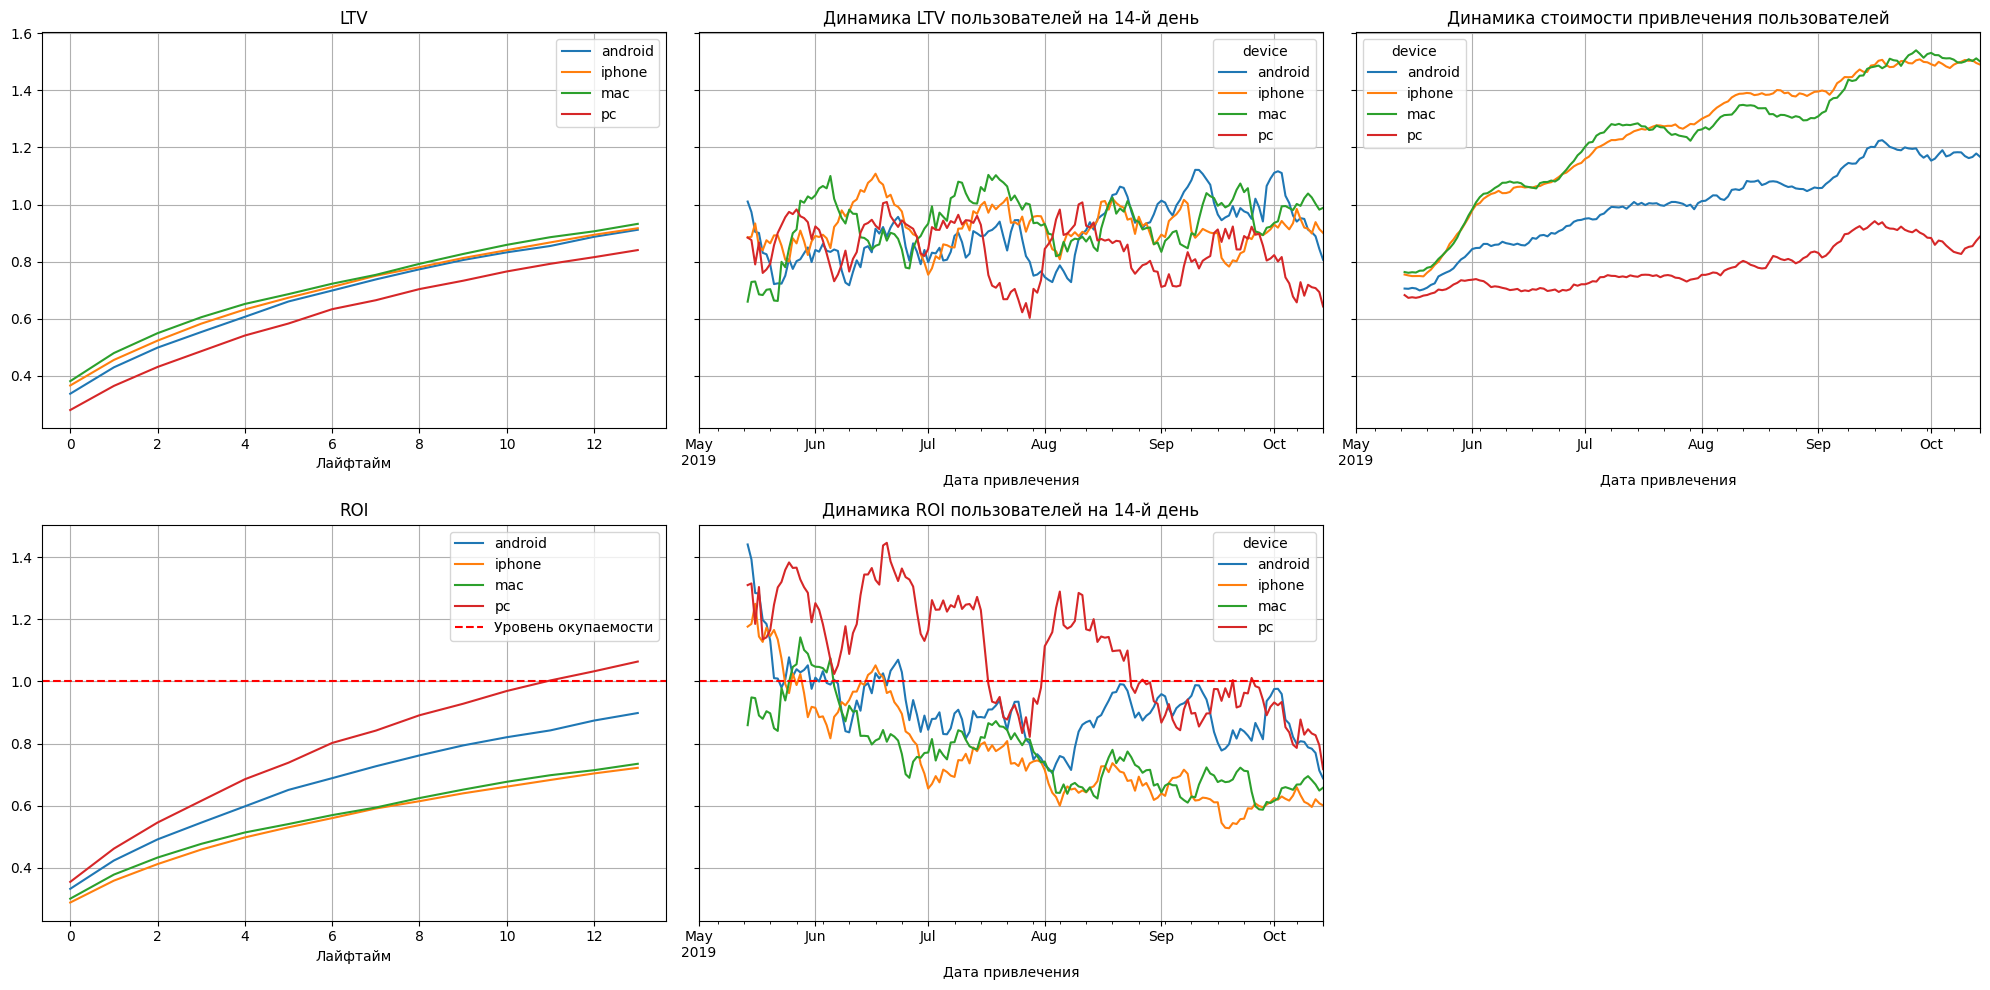

In [53]:
# Выведем соответствующие графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

Выводы

- Все девайсы имеют схожие тренды поведения LTV, CAC, ROI
- Стоит отметить разницу в стоимости привлечения CAC для устройств Apple (mac, iphone) и Android и PC. Последние имеют схожий по абсолютным значениям LTV, но гораздо меньше стоиомсть привлечения CAC, что позволяло выходить в плюс и окупать рекламные вложения в пользователей этих устройств. 
- Следует обратиь внимание на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть страдает.
- Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных.

In [54]:
# Проанализируем окупаемость рекламы с разбивкой по странам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['region']
)

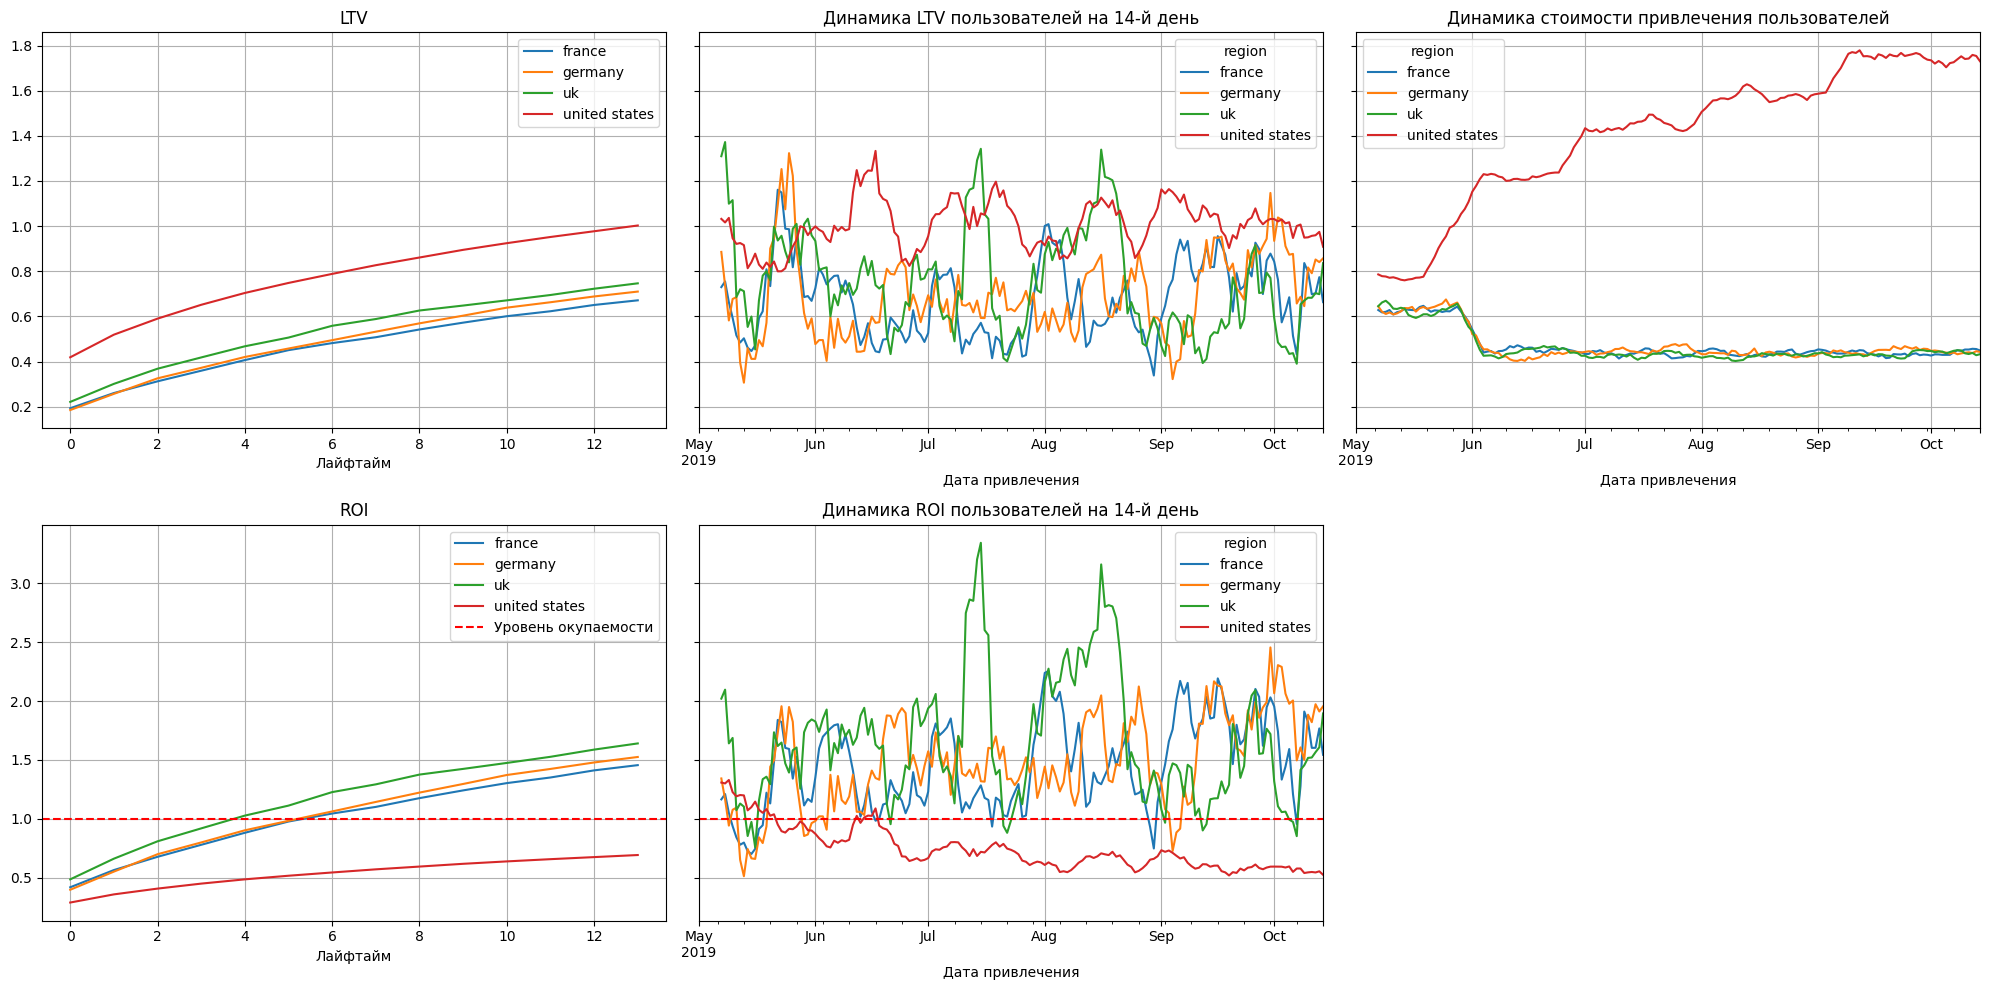

In [55]:
# Выведем соответствующие графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Выводы

- США является основным регионом по привлечению клиентов. Как мы видили ранее, количество привлеченных пользователей из США составляют большую часть.
- Усредненно LTV в США больше, чем в других странах. Но стоиомость привлечения в США в несколько раз выше чем в других странах, что не позволяет окупить вложенные средства.
- Как видим из графика динамики ROI все страны, кроме США окупают свои вложения и стоимость привлечения остается постоянной во времени в отличии от Соединенных Штатов, где с конца июня по конец октября реклама не окупалась и стоимость привлечения увеличивалась на всем временном промежутке.
- Лучше всего окупается Англия и Германия. Явный аутсайдер - США. Причем окупаемость пользователей начала падать с конца июня 2019 года.

In [56]:
# Проанализируем окупаемость рекламы с разбивкой по рекламным каналам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['channel']
)

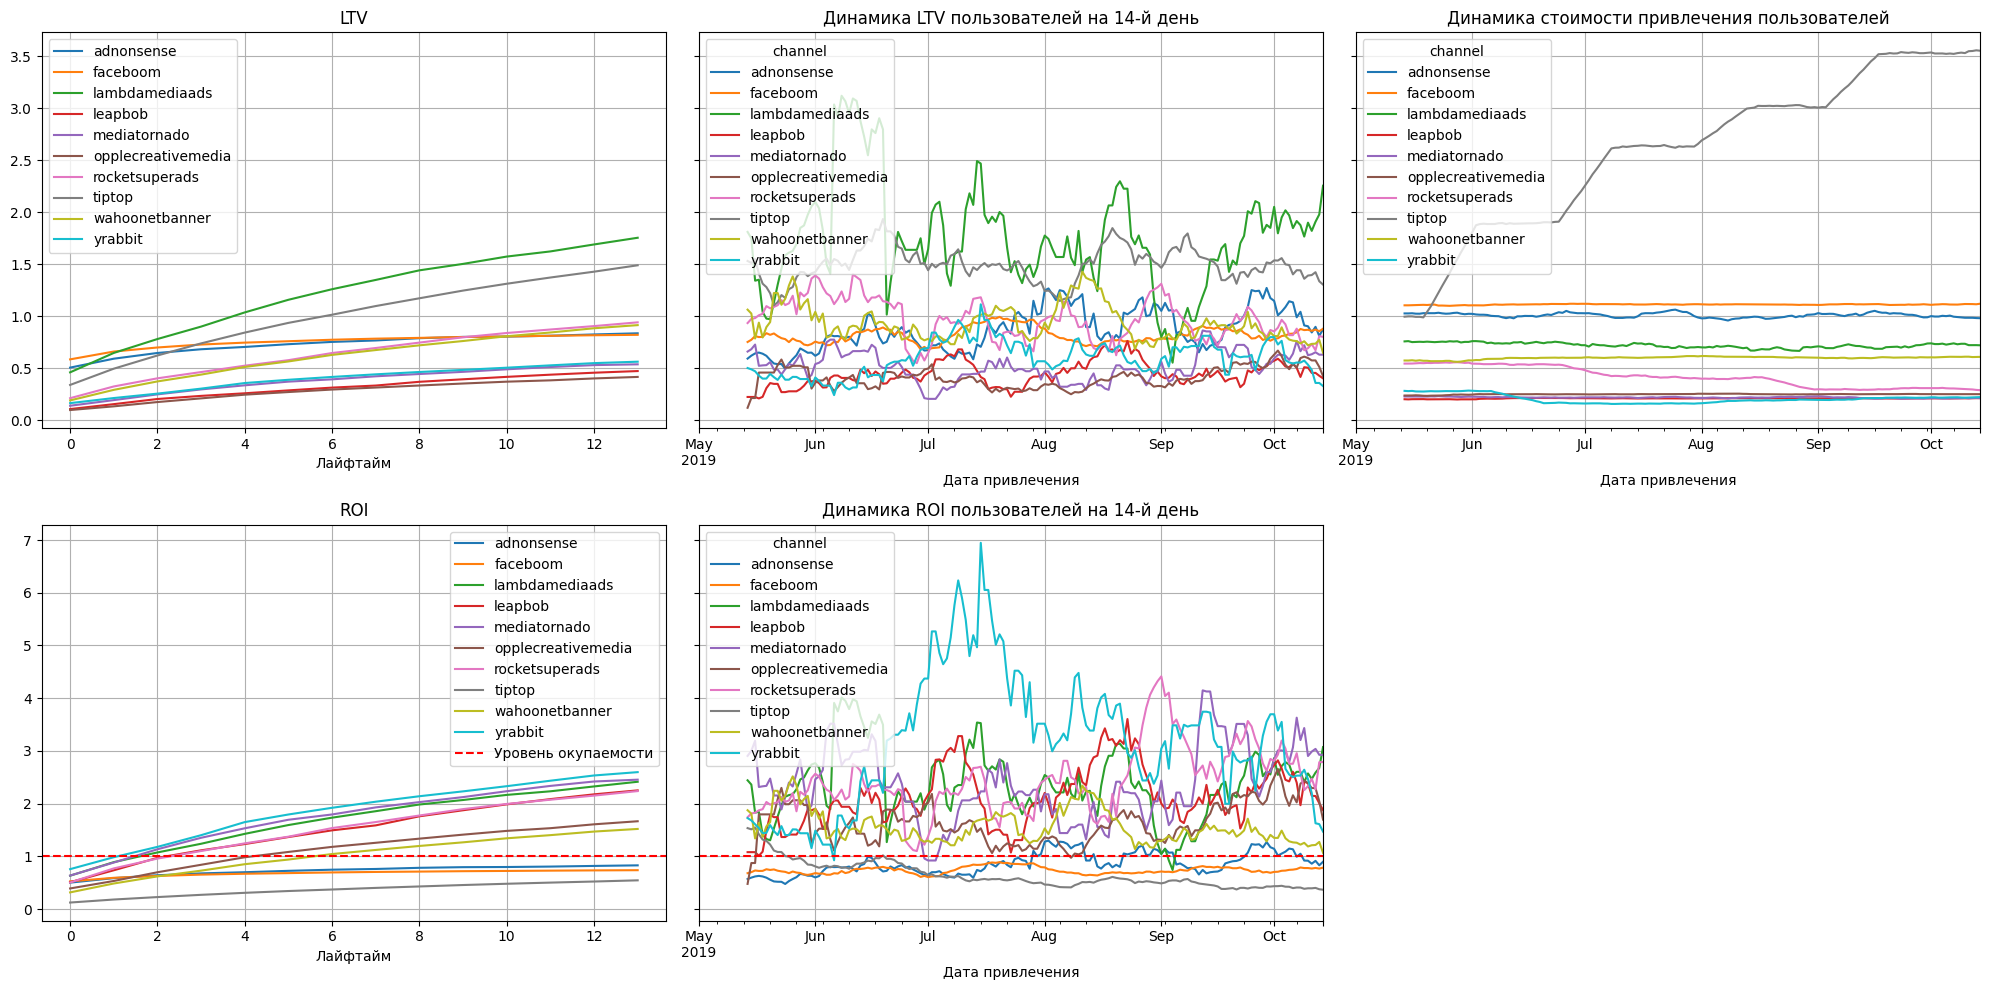

In [57]:
# Выведем соответствующие графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

Выводы

- Из графика динамики САС видно, что канал tiptop съедает большую часть рекламного бюджета. Высокая стоимость привлечения не позволяет окупить вложенные средства, т.к LTV находится на сравнительно том же как у других каналов уровне.
- График динамики ROI показывает, что каналы tiptop, faceboom и adnonsense на протяжении всего времени не окупились на 14-й день.
- Можно выделить наиболее перспективные каналы с точки зрения возврата инвестиций, это каналы yrabbit и lambdamediaads. На протяжении всего временного интервала, вложения в эти каналы окупались несколько раз из-за сравнительно низкой стоимости привлечения и хорошем уровне LTV.

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

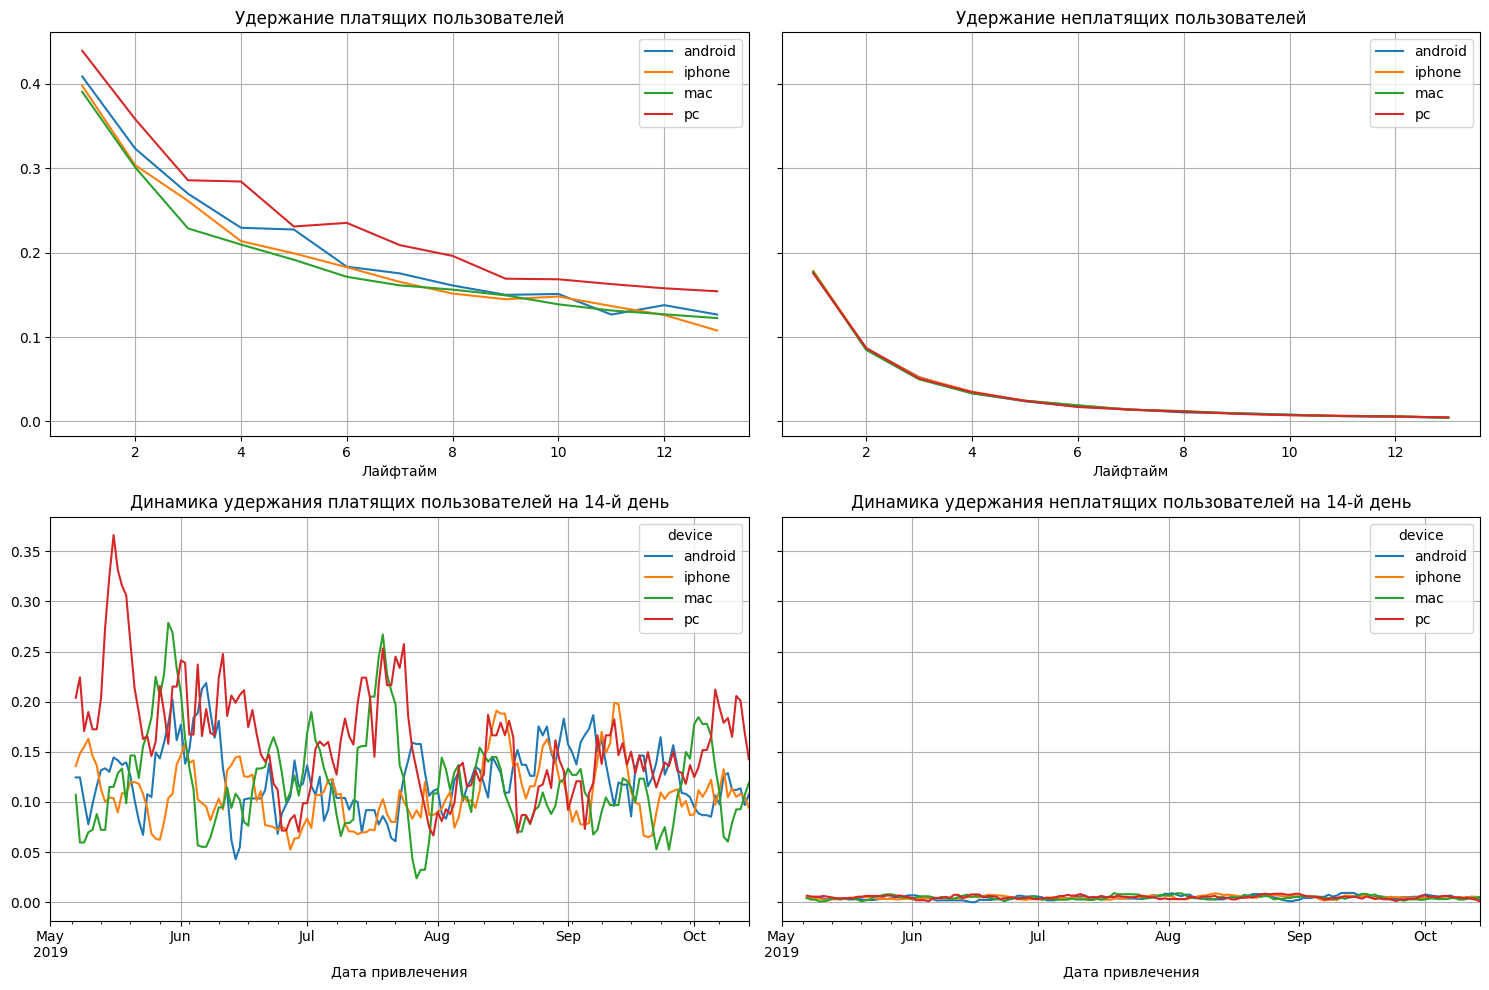

In [58]:
# Удержание и конверсия с разбивкой по устройствам.
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device'])

plot_retention(retention_grouped, retention_history, horizon_days)

Вывод

- В целом каких-то аномалий не наблюдается. Можно заметить, что пользователи PC немногим лучше удерживаются

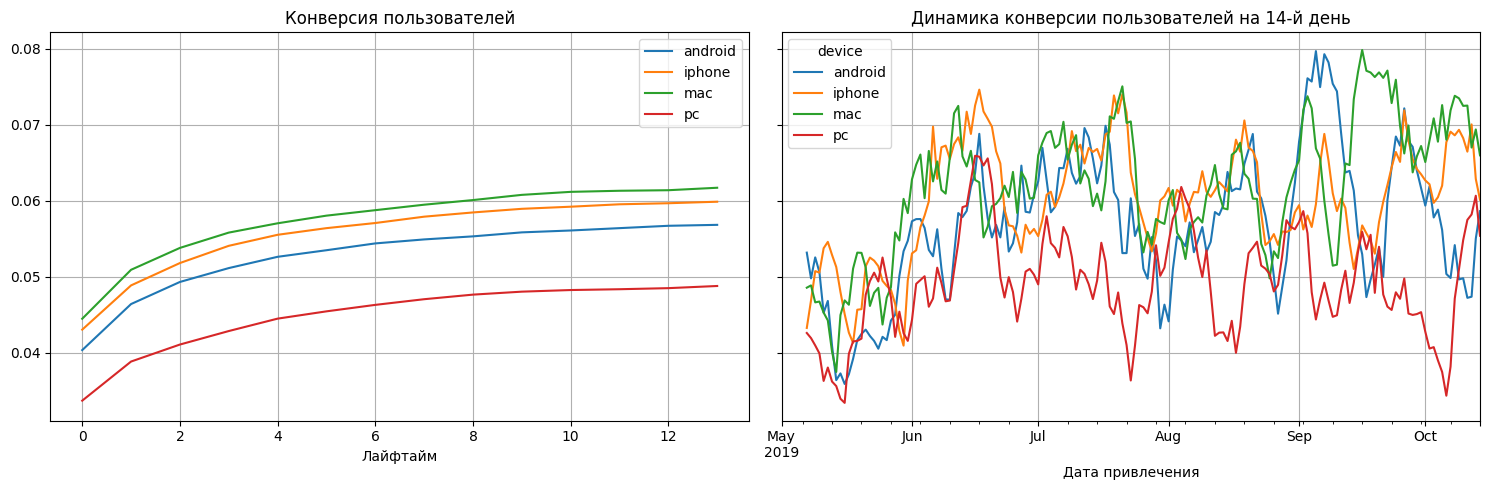

In [59]:
# Конверсия с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Вывод

- Здесь, картина противополжная удержанию, конверсия пользователей PC находится на самом низком уровне. 

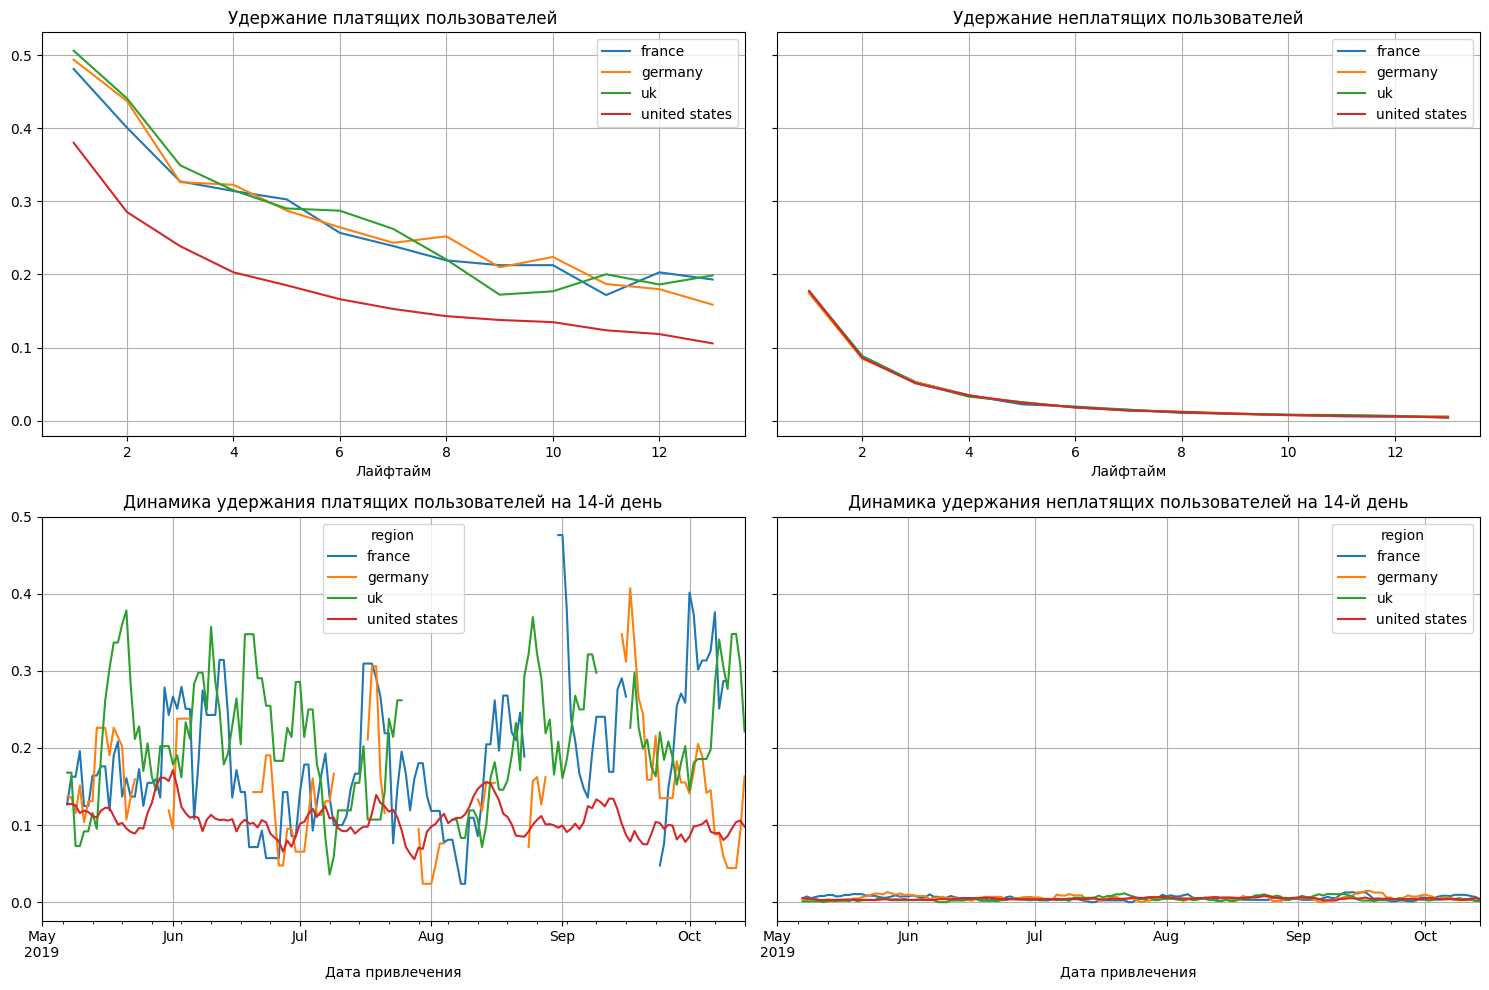

In [60]:
# Удержание и конверсия с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region'])

plot_retention(retention_grouped, retention_history, horizon_days)

Вывод

- Практически весь бюджет выделен на США при самой высокой стоимости привлечения и самом низком удержании пользователей. Это говорит о том, что большой отток пользователей будет вынуждать закупать еще рекламу, а реклама дорогая - юнит-экономика не сходится. 
- Нужно менять стратегию маркетинга - изменить регион привлечения пользователей.

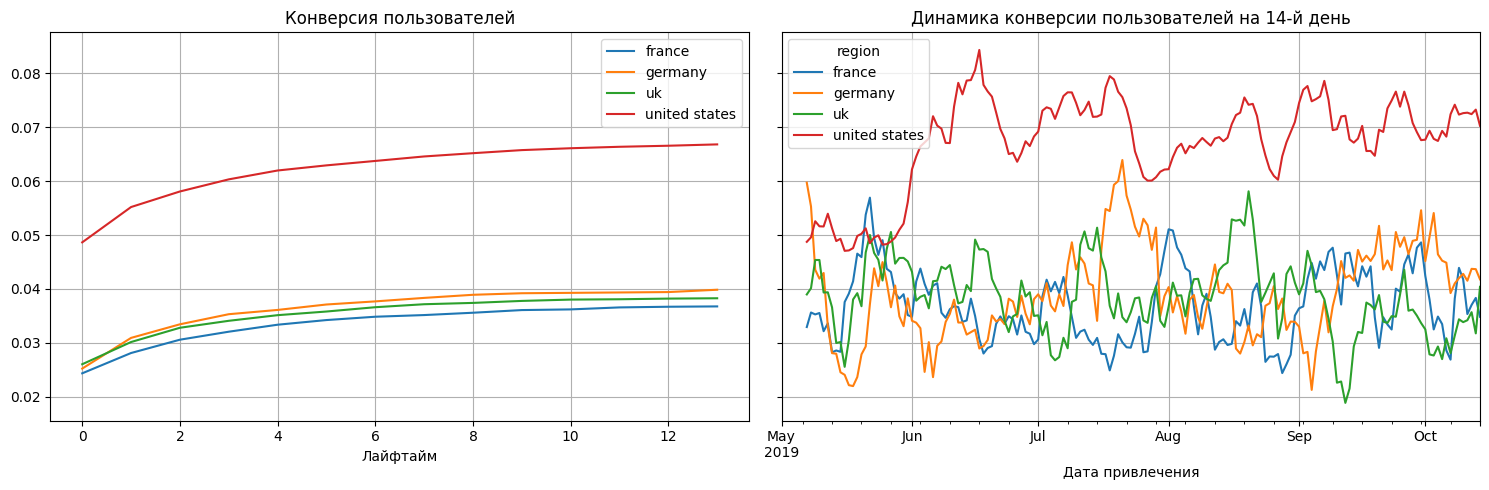

In [61]:
# Конверсию с разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Вывод

- Конверсия в США самая высокая и превышает другие страны, но это и понятно - самый большой рынок, самый высокий ввп и платежеспособность населения. Однако, этому сопутствует высокая конкуренция и как следствие огромная стоимость привлечения трафика и быстрое переключение пользователей с одного сервиса на другой, что подтверждает график удержания по странам.

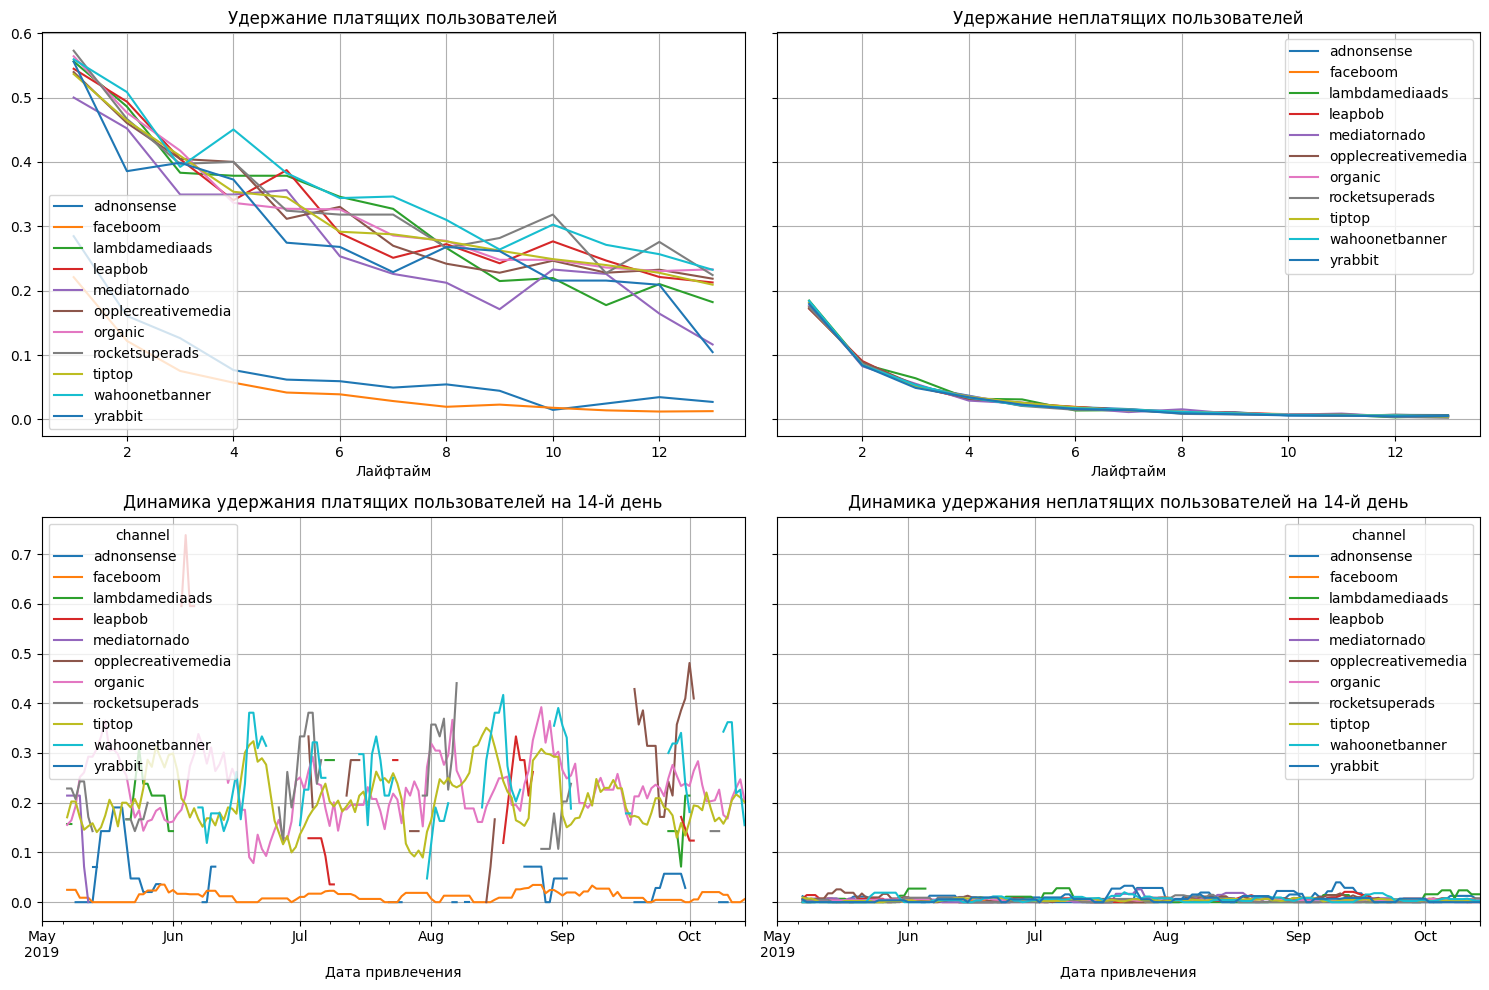

In [62]:
# Удержание и конверсия с разбивкой по рекламным каналам.
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon_days)

Вывод

- Удержание платящих пользователей из каналов faceboom и adnonsense самое низкое

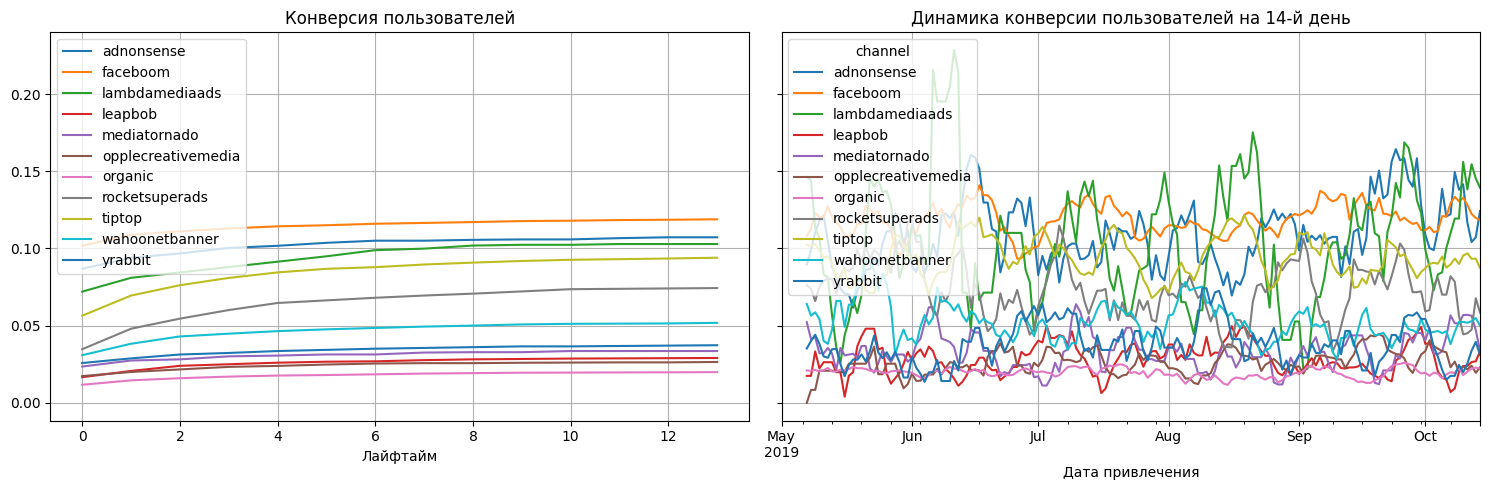

In [63]:
# Конверсия с разбивкой по каналам привлечения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Вывод

- Из показанных графиков можно сделать вывод о том, что рекламный бюджет расходовался преимущественно в США. Выявлено, что стоимость привлечения по всем каналам в США очень высокая в сравнении с другими странами. Исключать США из рекламных компаний довольно сложно, т.к это большой рынок и пользователи имеют гораздо лучшую конверсию в покупку в сравнении с другими странами. Вероятно, нужно оптимизировать распределение бюджета на рекламные площадки. Посмотрим более детально регион США и рекламные площадки. 

In [64]:
# Исключим из анализа органических пользователей
profiles_usa = profiles.query('region == "united states" and channel != "organic"')

In [65]:
# Сумма потраченная на рекламу в США
profiles_usa['acquisition_cost'].sum()

90928.59999999999

In [66]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel']
)

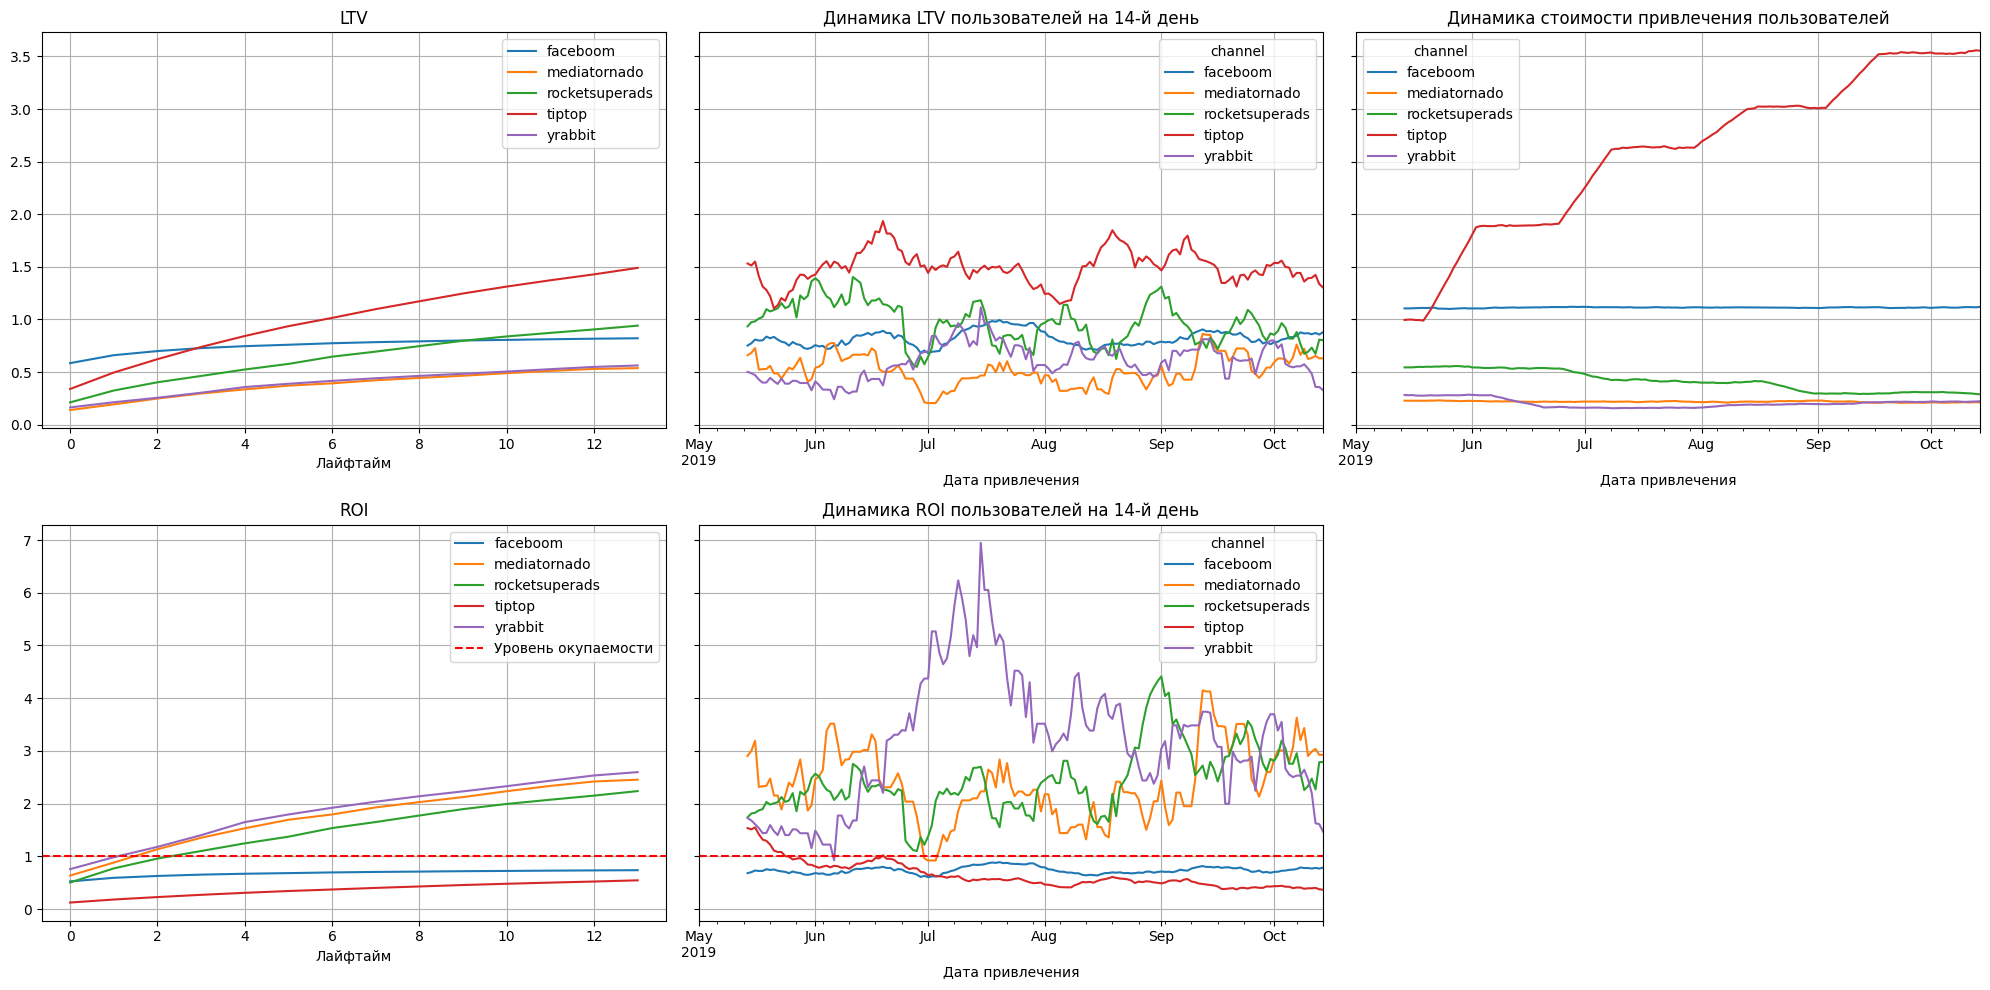

In [67]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

Вывод

- Теперь видно, какие каналы не окупались в США - это tiptop и  faceboom и именно на эти каналы было израсходовано больше всего денег.

# Выводы и рекомендации


Целью аналитического проекта было вявить причину не эффективной рекламной компании привлечения пользователей с 1 мая 2019 по 27 октября 2019. В результате анализа были сделаны следующие выводы:

1. Продуктовые метрики имеют показатели: количество пользователей в день, частота использования приложения, средняя длительность сессии, количество покупок на пользователя. Нет причин, позволяющих утверждать, что плохое качество продукта является главным признаком плохой окупаемости рекламы.
2. На рекламу было потрачено 105 497. Общая выручка составила 215 963. Доля рекламных расходов составила почти 50 %.
3. Рекламный бюджет был распределен между 11 площадками. На 2 площадки tiptop и faceboom пришлось 82% бюджета или 87 196.
4. Пользователи привлекались из четырёх стран, на долю США пришлось 90 928 или 86 % бюджета. Из них большая часть пришлась на два вышеупомянутых канала.
5. Именно эти два канала оказали отрицателное влияние на общий показатель ROI и как следствие на эффективность всей рекламной кампании. На графике динамики ROI пользователей на 14-й день по стране США видно, что только эти два канала привлечения находятся ниже уровня окупаемости.
6. Пользователи всех устройств окупались до июня. К сентябрю ROI пользователей PC на 14 день был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня начиная с июня.
7. LTV пользователей подвержен сезонности, но стабилен. Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных. В целом, видим, что стоимость привлечения пользователей всех устройств росла за рассматриваемый период.
8. Следует обратить вниманиена владельцев Mac и iPhone - стоимость их привлечения высока и растет от месяца к месяцу, а окупаемоcть низка. Пользователи Mac, Android и iPhone конвертируются неплохо, причём постоянно, видимо, дело в удержании. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.
9.  Большая доля пользователей - это люди из США (66.66%). Далее идут примерно равные доли пользователей из Англии и Франции (~ 12%). Меньше всего пользователей из Германии (~ 10%) Платящие пользователи из США лидируют (78%), доли платящих из Франции и Англии примерно равны (7-8%), меньше всего платящих пользователей из Германии (~ 7%).
10. В целом, реклама близка к окупемости, если учитывать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. ROI — примерно 80%. Не окупаются пользователи, привлеченные из каналов adnonsense, faceboom, tiptop. Проблемы окупаемости могут быть вызваны неэффективным распределением средств на рекламу (в какой-то источник вложено больше средств, чем в остальные, а он не оправдал надежд), также возможно, что горизонт анализа недостаточен для анализа окупаемости.

### Рекомендации отделу маркетинга.

* Перераспределить рекламный бюджет. Исходя из вышеизложенных выводов, обратить внимание на другие рекламные площадки где стоимость привлечения ниже а LTV на сравнимом уровне, в США это все площаки, кроме tiptop и faceboom, в Европе это lamdamediaads. Данные площаки показывали хороший уровень ROI на протяжении всего рассматриваемого периода, что с большей вероятностью может подтвердится и в будущем.

* Отказываться от площадок tiptop и faceboom не стоит. Возможно, следует изменить стратегию рекламы на этих площадках снизить CAC и ограничить бюджет. Следует отметить, что если платящие пользователи от tiptop показывали хороший уровень retention, то пользователи от faceboom имели сравнительно низкий уровень, что хорошо видно на графике удержания с разбивкой по каналам привлечения. Вероятно, следует поменять установки и привлекать другую аудиторию.